In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
bike3 = pd.read_csv('201803-citibike-tripdata.csv')
bike4 = pd.read_csv('201804-citibike-tripdata.csv')
bike5 = pd.read_csv('201805-citibike-tripdata.csv')
bike6 = pd.read_csv('201806-citibike-tripdata.csv')
bike7 = pd.read_csv('201807-citibike-tripdata.csv')
bike8 = pd.read_csv('201808-citibike-tripdata.csv')

In [4]:
bike = pd.concat([bike3,bike4,bike5,bike6,bike7,bike8],axis=0)

In [5]:
bike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,816,2018-03-01 02:29:13.7270,2018-03-01 02:42:50.1460,72.0,W 52 St & 11 Ave,40.767272,-73.993929,379.0,W 31 St & 7 Ave,40.749156,-73.991600,31413,Subscriber,1973,1
1,235,2018-03-01 05:12:37.0320,2018-03-01 05:16:32.1010,72.0,W 52 St & 11 Ave,40.767272,-73.993929,478.0,11 Ave & W 41 St,40.760301,-73.998842,33202,Subscriber,1965,1
2,1250,2018-03-01 05:45:49.9000,2018-03-01 06:06:39.9080,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3664.0,North Moore St & Greenwich St,40.720195,-74.010301,26675,Subscriber,1984,1
3,741,2018-03-01 06:54:19.6150,2018-03-01 07:06:40.9790,72.0,W 52 St & 11 Ave,40.767272,-73.993929,459.0,W 20 St & 11 Ave,40.746745,-74.007756,31011,Subscriber,1981,1
4,727,2018-03-01 07:08:38.8610,2018-03-01 07:20:46.8500,72.0,W 52 St & 11 Ave,40.767272,-73.993929,2006.0,Central Park S & 6 Ave,40.765909,-73.976342,30616,Subscriber,1990,2


In [124]:
short = bike[bike.tripduration < 3600]
longt = bike[bike.tripduration >= 3600]

### Histogram

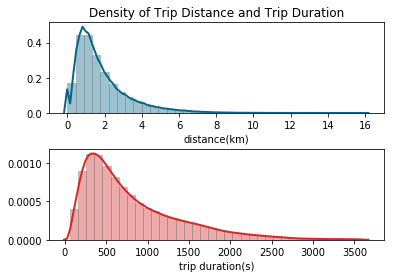

In [125]:
figure, (ax1,ax2) = plt.subplots(2, 1)
index = 0

plt.subplots_adjust(hspace=0.4, wspace=0.4)
f1 = sns.distplot(short['distance'], hist=True, kde=True, 
             bins=int(180/5), color = '#086788', 
             hist_kws={'edgecolor':'grey'},
             kde_kws={'linewidth': 2}, ax = ax1)
f1.set_xlabel('distance(km)')
#ax1.set_xticklabels()
f1.set_title('Density of Trip Distance and Trip Duration')
f2 = sns.distplot(short['tripduration'], hist=True, kde=True, 
             bins=int(180/5), color = '#D62828', 
             hist_kws={'edgecolor':'grey'},
             kde_kws={'linewidth': 2},ax=ax2)
f2.set_xlabel('trip duration(s)')
plt.savefig('density.png')
plt.show()

### Stack plot

In [9]:
bike['starttime'] = pd.to_datetime(bike.starttime)

In [10]:
bike['stoptime'] = pd.to_datetime(bike.stoptime)

In [11]:
bike['week'] = bike.starttime.dt.week

In [12]:
bike['date'] = bike.starttime.dt.date

In [13]:
bike['hr'] = bike.starttime.dt.hour

In [14]:
bike['period'] = bike['hr'].map(lambda x: 0 if x < 12 else 1 if x < 18 else 2)

In [15]:
week_count = bike.groupby(['week','period'])['bikeid'].count()

In [16]:
week_count = week_count.to_frame().reset_index()
week_count.head()

,week,period,bikeid
0,9,0,36271
1,9,1,48005
2,9,2,21769
3,10,0,71354
4,10,1,81988


In [17]:
y1 = week_count[week_count.period==0].bikeid
y2 = week_count[week_count.period==1].bikeid
y3 = week_count[week_count.period==2].bikeid

<Figure size 720x432 with 0 Axes>

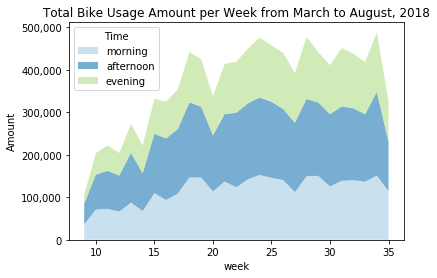

In [127]:
import matplotlib
plt.figure(figsize=(10,6))
fig, ax1 = plt.subplots(1, 1)
pal = sns.color_palette("Paired")
ax1.stackplot(week_count.week.unique(),y1, y2, y3, labels=['morning','afternoon','evening'],colors=pal, alpha=0.6)
ax1.legend(loc='upper left')
plt.title("Total Bike Usage Amount per Week from March to August, 2018")
plt.xlabel('week')
plt.ylabel('Amount')
plt.legend(title='Time', loc='upper left')
ax1.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.savefig('stack.png')

### Barplot

In [164]:
station = bike.groupby('start station name').bikeid.count().to_frame().reset_index()

In [165]:
station2 = station.sort_values('bikeid',ascending=False)[:20]

In [166]:
station3 = bike.groupby(['start station name','usertype']).bikeid.count().to_frame().reset_index()

In [167]:
station4 = station2.merge(station3, on = 'start station name', how = 'left')

In [168]:
station4.head()

,start station name,bikeid_x,usertype,bikeid_y
0,Pershing Square North,84195,Customer,5662
1,Pershing Square North,84195,Subscriber,78533
2,E 17 St & Broadway,61330,Customer,5082
3,E 17 St & Broadway,61330,Subscriber,56248
4,W 21 St & 6 Ave,59758,Customer,3010


In [169]:
x = station4['start station name'].unique()
y_cus = station4[station4.usertype == 'Customer'].bikeid_y
cus_std = np.std(y_cus)
y_sub = station4[station4.usertype == 'Subscriber'].bikeid_y
sub_std = np.std(y_sub)

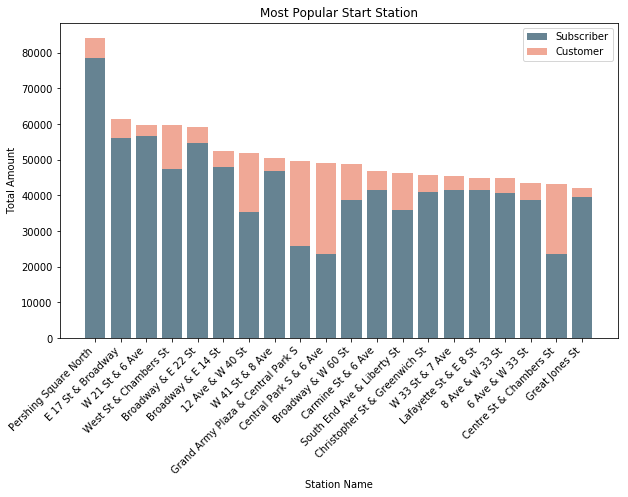

In [170]:
plt.figure(figsize=(10,6))
width = 0.8
p1 = plt.bar(x, y_sub, width, color = '#003049',alpha=0.6)
p2 = plt.bar(x, y_cus, width,
             bottom=y_sub,color = '#E76F51',alpha=0.6)
plt.legend((p1[0], p2[0]), ('Subscriber', 'Customer'))
plt.ylabel('Total Amount')
plt.xlabel('Station Name')
plt.title('Most Popular Start Station')
plt.xticks(rotation=45,ha='right')
plt.subplots_adjust(bottom=0.15)
plt.savefig('start.png')

In [171]:
station = bike.groupby('end station name').bikeid.count().to_frame().reset_index()
station2 = station.sort_values('bikeid',ascending=False)[:20]
station3 = bike.groupby(['end station name','usertype']).bikeid.count().to_frame().reset_index()
station4 = station2.merge(station3, on = 'end station name', how = 'left')

In [172]:
x = station4['end station name'].unique()
y_cus = station4[station4.usertype == 'Customer'].bikeid_y
cus_std = np.std(y_cus)
y_sub = station4[station4.usertype == 'Subscriber'].bikeid_y
sub_std = np.std(y_sub)

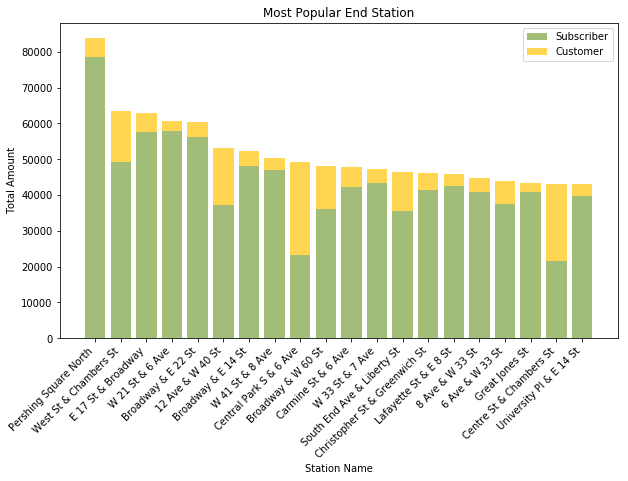

In [175]:
plt.figure(figsize=(10,6))
width = 0.8
p1 = plt.bar(x, y_sub, width, color = '#7BA23F',alpha=0.7)
p2 = plt.bar(x, y_cus, width,
             bottom=y_sub,color = '#FFC408',alpha=0.7)
plt.legend((p1[0], p2[0]), ('Subscriber', 'Customer'))
plt.xticks(rotation=45,ha='right')
plt.ylabel('Total Amount')
plt.xlabel('Station Name')
plt.title('Most Popular End Station')
plt.subplots_adjust(bottom=0.15)
plt.savefig('end.png')

### Box plot

In [29]:
bike['dayname'] = bike.starttime.dt.day_name()

In [44]:
data = bike[['tripduration','usertype','dayname','gender','distance']]

In [45]:
data.gender = data.gender.map({1:'Men', 0:'Women',2:'Unknown'})
data = data[data.tripduration< 3600]

/Users/hongdouli/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


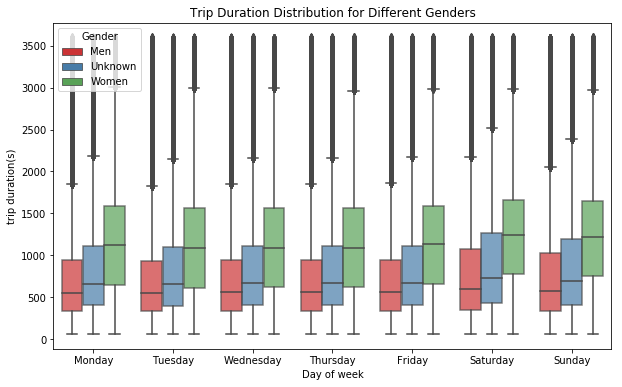

In [144]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="dayname", y="tripduration", hue="gender",data=data, palette="Set1",boxprops=dict(alpha=.7),
                order=["Monday", "Tuesday","Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.ylabel("trip duration(s)")
plt.xlabel("Day of week")
plt.title("Trip Duration Distribution for Different Genders")
plt.legend(loc='upper left',title='Gender')
plt.savefig('duration.png')

### Scatter plot

In [66]:
bike['timediff'] = (bike.stoptime-bike.starttime).dt.seconds

In [67]:
day = bike #[bike.date == bike.date.iloc[1177147]]

In [33]:
from math import sin, cos, sqrt, atan2, radians
def get_distance(lat1, lon1, lat2, lon2):
# approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [35]:
bike['distance'] = bike[['start station latitude','start station longitude', 'end station latitude','end station longitude']].apply(lambda x: get_distance(*x), axis=1)

In [36]:
bike['speed'] = bike['distance'] * 1000/bike['tripduration']

In [38]:
speed_day = bike.groupby(['gender','hr']).speed.agg(['mean','count']).reset_index()

In [39]:
speed_day.gender = speed_day.gender.map({1:'Men', 0:'Women',2:'Unknown'})

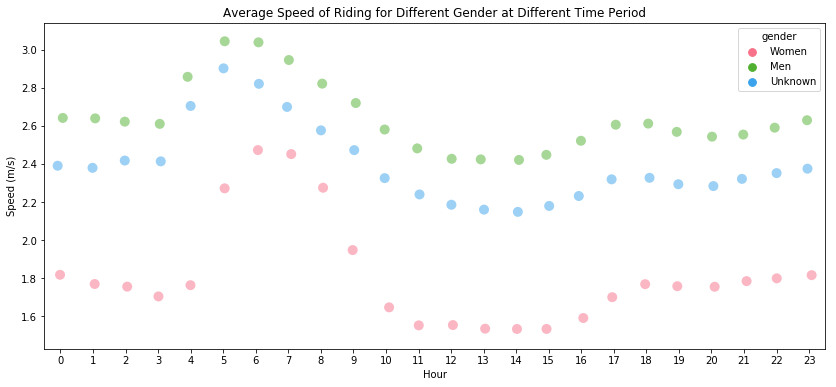

In [145]:
plt.figure(figsize=(14,6))
sns.stripplot(speed_day.hr,speed_day['mean'],size = 10,hue=speed_day.gender,alpha=0.5,palette="husl")
plt.title('Average Speed of Riding for Different Gender at Different Time Period')
plt.xlabel('Hour')
plt.ylabel('Speed (m/s)')
plt.savefig('speed.png')

### Bubble map

In [47]:
bike_df = bike.groupby(['start station latitude','start station longitude','start station name','usertype']).bikeid.agg('count').to_frame().reset_index()

In [48]:
bike_sub = bike_df[bike_df.usertype == 'Subscriber']
bike_cus = bike_df[bike_df.usertype == 'Customer']

In [119]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


shaz13_custom_style = "mapbox://styles/hongdouli/cjvpi0fwh0hep1djmo143cmum"
#set the geo=spatial data
Subscriber = [go.Scattermapbox(
            lat= bike_sub['start station latitude'] ,
            lon= bike_sub['start station longitude'],
            customdata = bike_sub['bikeid'],
            mode='markers',
            marker=dict(
                size= bike_sub['bikeid']/3000,
                color = '#1768AC',
                opacity = .8,
            ),
            text= bike_sub['start station name'],
            name = 'Subscriber',
    showlegend=True
          )]

Customer = [go.Scattermapbox(
            lat= bike_cus['start station latitude'] ,
            lon= bike_cus['start station longitude'],
            customdata = bike_cus['bikeid'],
            mode='markers',
            marker=dict(
                size= bike_cus['bikeid']/1300,
                color = '#FF928B',
                opacity = .8,
            ),
            text= bike_cus['start station name'],
            name = 'Customer',
    showlegend=True
          )]

layout = go.Layout(
    autosize=False,
    hovermode='closest',
    mapbox=go.layout.Mapbox(
        accesstoken="pk.eyJ1IjoiaG9uZ2RvdWxpIiwiYSI6ImNqdnBoeXN1NzI5dGk0M3VpdmV6MWQyZXUifQ.g_W4rIo74-9fl3TMhWO5VQ",
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=40.751319,
            lon=-73.987130,
        ),
        pitch=0,
        zoom=10.7
    ),
    width=900,
    height=600, 
    title = "Start Locations in NewYork"
)

fig = dict(data=Subscriber+Customer, layout=layout)
py.iplot(fig)

/Users/hongdouli/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### Connection Map

In [50]:
df_psn = bike[bike['start station name'] == 'Pershing Square North']

In [51]:
df_psn = df_psn.groupby(['start station latitude','start station longitude','start station name',
                'end station latitude','end station longitude','end station name']).bikeid.count().to_frame().reset_index()

In [52]:
df_psn = df_psn.sort_values('bikeid',ascending=False).reset_index()

In [53]:
df_psn['bikeid'][0]

2657

In [176]:
shaz13_custom_style = "mapbox://styles/hongdouli/cjvpjncz31d771cntjf4god1h"
#set the geo=spatial data
station = [go.Scattermapbox(
            lat= df_psn['end station latitude'] ,
            lon= df_psn['end station longitude'],
            customdata = df_psn['bikeid'],
            mode='markers',
            marker=dict(
                size= 3,
                color = '#FFC408',
                opacity = .8,
            ),
            text= None,
    showlegend=False
          )]

bike_paths = []
for i in range(len(df_psn)):
    bike_paths.append(
        go.Scattermapbox(
            lon = [df_psn['start station longitude'][i], df_psn['end station longitude'][i]],
            lat = [df_psn['start station latitude'][i], df_psn['end station latitude'][i]],
            mode = 'lines',
            line= go.scattermapbox.Line(
                width = 1.5,
                color = '#7BA23F',),
            opacity = min(1.0, float(df_psn['bikeid'][i]) / float(df_psn['bikeid'].max()) * 2),
            name = df_psn['end station name'][i]
        )
    )

layout = go.Layout(
    autosize=False,
    hovermode='closest',
    mapbox=go.layout.Mapbox(
        accesstoken="pk.eyJ1IjoiaG9uZ2RvdWxpIiwiYSI6ImNqdnBoeXN1NzI5dGk0M3VpdmV6MWQyZXUifQ.g_W4rIo74-9fl3TMhWO5VQ",
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=40.751319,
            lon=-73.987130,
        ),
        pitch=0,
        zoom=11,
        style='light',
    ),
    width=900,
    height=600, 
    title = "Popular Destination from Pershing Square North"
)

fig = dict(data=station+bike_paths, layout=layout)
iplot(fig)

### Heatmap

In [57]:
bike['dayofweek'] = bike.starttime.dt.dayofweek

In [59]:
week_hour = bike.groupby(['dayofweek','hr'])['bikeid'].count().to_frame().reset_index()

In [61]:
week_hour = week_hour.pivot(index='dayofweek',columns='hr')['bikeid']

In [62]:
week_hour.index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [63]:
week_hour.columns = range(1,25)

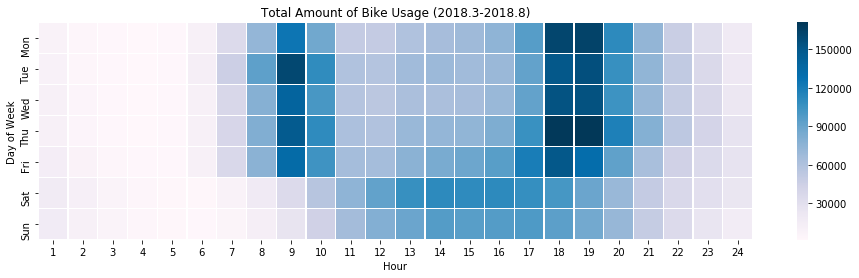

In [67]:
plt.figure(figsize=(16,4))
sns.heatmap(week_hour,linewidths=.3,cmap='PuBu')
plt.xlabel('Hour')
plt.ylabel('Day of Week')
plt.title('Total Amount of Bike Usage (2018.3-2018.8)')
plt.savefig('week7.png')

### Chloropeth Map

In [70]:
import shapefile
from shapely.geometry import Polygon
sf = shapefile.Reader("taxi_zones.shp")

In [71]:
fields_name = [field[0] for field in sf.fields[1:]]

In [72]:
shp_dic = dict(zip(fields_name, list(range(len(fields_name)))))

In [73]:
attributes = sf.records()

In [74]:
shp_attr = [dict(zip(fields_name, attr)) for attr in attributes]

In [75]:
def get_lat_lon(sf):
    content = []
    for sr in sf.shapeRecords():
        shape = sr.shape
        rec = sr.record
        loc_id = rec[shp_dic['LocationID']]
        
        x = (shape.bbox[0]+shape.bbox[2])/2
        y = (shape.bbox[1]+shape.bbox[3])/2
        
        content.append((loc_id, x, y))
    return pd.DataFrame(content, columns=["LocationID", "longitude", "latitude"])

In [76]:
sf = shapefile.Reader("taxi_zones.shp")
fields_name = [field[0] for field in sf.fields[1:]]
shp_dic = dict(zip(fields_name, list(range(len(fields_name)))))
attributes = sf.records()
shp_attr = [dict(zip(fields_name, attr)) for attr in attributes]

df_loc = pd.DataFrame(shp_attr).join(get_lat_lon(sf).set_index("LocationID"), on="LocationID")

In [77]:
def get_boundaries(sf):
    lat, lon = [], []
    for shape in list(sf.iterShapes()):
        lat.extend([shape.bbox[0], shape.bbox[2]])
        lon.extend([shape.bbox[1], shape.bbox[3]])

    margin = 0.01 # buffer to add to the range
    lat_min = min(lat) - margin
    lat_max = max(lat) + margin
    lon_min = min(lon) - margin
    lon_max = max(lon) + margin

    return lat_min, lat_max, lon_min, lon_max

get_boundaries(sf)

(913175.099008804, 1067382.518405164, 120121.87125434518, 272844.3040054685)

In [116]:
def draw_region_map(ax, sf, heat={}):
    continent = [235/256, 151/256, 78/256]
    ocean = (89/256, 171/256, 227/256)    
    
    #reg_list={'Staten Island':1, 'Queens':2, 'Bronx':3, 'Manhattan':4, 'EWR':5, 'Brooklyn':6}
    reg_list={'Staten Island':1, 'Queens':2, 'Bronx':3, 'Manhattan':4, 'EWR':5, 'Brooklyn':6}
    reg_x = {'Staten Island':[], 'Queens':[], 'Bronx':[], 'Manhattan':[], 'EWR':[], 'Brooklyn':[]}
    reg_y = {'Staten Island':[], 'Queens':[], 'Bronx':[], 'Manhattan':[], 'EWR':[], 'Brooklyn':[]}
    
    # colorbar
    if len(heat) != 0:
        norm = mpl.colors.Normalize(vmin=math.sqrt(min(heat.values())), vmax=math.sqrt(max(heat.values()))) #norm = mpl.colors.LogNorm(vmin=1,vmax=max(heat))
        cm=plt.get_cmap('Reds')
        #sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
        #sm.set_array([])
        #plt.colorbar(sm, ticks=np.linspace(min(heat.values()),max(heat.values()),8), \
        #             boundaries=np.arange(min(heat.values())-10,max(heat.values())+10,.1))
    
    ax.set_facecolor(ocean)
    for sr in sf.shapeRecords():
        shape = sr.shape
        rec = sr.record
        reg_name = rec[shp_dic['borough']]

        if reg_name != 'Manhattan' and reg_name != 'Brooklyn':
            col = [1,1,1]
        elif len(heat) == 0:
            norm = mpl.colors.Normalize(vmin=1,vmax=6) #norm = mpl.colors.LogNorm(vmin=1,vmax=max(heat))
            cm=plt.get_cmap('Pastel1')
            R,G,B,A = cm(norm(reg_list[reg_name]))
            col = [R,G,B]
        else:
            R,G,B,A = cm(norm(math.sqrt(heat[reg_name])))
            col = [R,G,B]
            
        # check number of parts (could use MultiPolygon class of shapely?)
        nparts = len(shape.parts) # total parts
        if nparts == 1:
            polygon = Polygon(shape.points)
            patch = PolygonPatch(polygon, facecolor=col, alpha=1, zorder=2)
            ax.add_patch(patch)
        else: # loop over parts of each shape, plot separately
            for ip in range(nparts): # loop over parts, plot separately
                i0 = shape.parts[ip]
                if ip < nparts-1:
                    i1 = shape.parts[ip+1]-1
                else:
                    i1 = len(shape.points)

                polygon = Polygon(shape.points[i0:i1+1])
                patch = PolygonPatch(polygon, facecolor=col, alpha=1, zorder=2)
                ax.add_patch(patch)
                
        reg_x[reg_name].append((shape.bbox[0]+shape.bbox[2])/2)
        reg_y[reg_name].append((shape.bbox[1]+shape.bbox[3])/2)
        
    for k in reg_list:
        if len(heat)==0:
            plt.text(np.mean(reg_x[k]), np.mean(reg_y[k]), k, horizontalalignment='center', verticalalignment='center',
                        bbox=dict(facecolor='black', alpha=0.5), color="white", fontsize=12)     
        else:
            plt.text(np.mean(reg_x[k]), np.mean(reg_y[k]), "{}\n({}K)".format(k, heat[k]/1000), horizontalalignment='center', 
                     verticalalignment='center',bbox=dict(facecolor='black', alpha=0.5), color="white", fontsize=12)       

    # display
    limits = get_boundaries(sf)
    plt.xlim(limits[0], limits[1])
    plt.ylim(limits[2], limits[3])

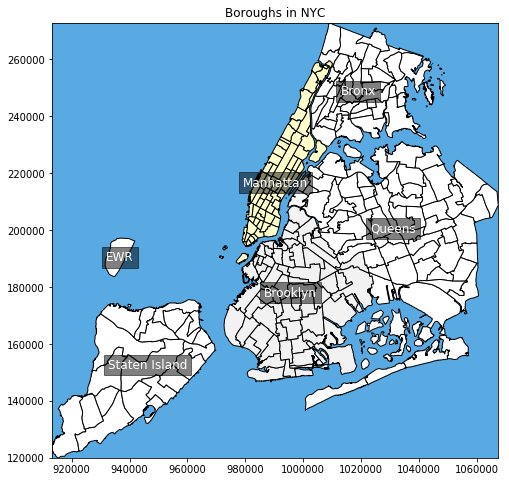

In [118]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from descartes.patch import PolygonPatch
import numpy as np
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
ax = plt.subplot(1, 1, 1)
ax.set_title("Boroughs in NYC")
draw_region_map(ax, sf)
#ax = plt.subplot(1, 2, 2)
#ax.set_title("Zones in NYC")
#draw_zone_map(ax, sf)
plt.savefig('chloropleth_map.png')